## 1. 데이터 확인

### 필수 라이브러리

In [26]:
import pandas as pd

### 데이터 셋 읽어오기

In [27]:
df_train = pd.read_csv("./data/train.csv") # 학습용 데이터
df_test = pd.read_csv("./data/submission.csv") # 테스트 데이터(제출파일의 데이터)

In [28]:
df_train.tail(7) # 학습용 데이터 살펴보기

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
59292,1.00,/Baturaja/Indonesia,AS,NaN,36256,NaN,Enterprise,NaN,NaN,NaN,...,LGEIN,more than a year,0,0,0.000026,0.028777,public facility,NaN,774,False
59293,1.00,/Sląskie/Poland,AS,NaN,33747,End Customer,SMB,NaN,NaN,NaN,...,LGEPL,3 months ~ 6 months,0,0,0.000026,0.028777,public facility,Others,694,False
59294,1.00,/Sląskie/Poland,AS,NaN,33747,End Customer,SMB,NaN,NaN,NaN,...,LGEPL,3 months ~ 6 months,0,0,0.000026,0.028777,public facility,Others,694,False
59295,0.75,/Bogotá DC /Colombia,AS,0.04,35420,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGECB,9 months ~ 1 year,0,0,0.000026,0.028777,public facility,NaN,39,False
59296,0.75,/Pisco/Peru,AS,0.04,19249,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEPR,less than 3 months,0,0,0.000026,0.028777,public facility,NaN,125,False
59297,1.00,/santa cruz bolivia/Peru,AS,0.04,40327,NaN,Enterprise,NaN,NaN,NaN,...,LGEPR,more than a year,0,0,0.000026,0.028777,public facility,NaN,134,False
59298,0.75,/paris/France,Solution,NaN,30268,NaN,Enterprise,NaN,NaN,NaN,...,LGEKR,less than 3 months,0,0,0.000026,NaN,public facility,NaN,441,False


타겟변수(is_converted)를 포함하여 29개의 칼럼으로 이루어져 있고  
59298개의 데이터를 가짐을 확인할수 있다.

In [29]:
df_test.tail(7) # 테스트 데이터 살펴보기

,id,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
5264,9120,1.00,/ Mumbi / India,AS,0.028986,6034,End Customer,SMB,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.001183,0.011583,retail,NaN,90,False
5265,4179,0.25,/ Bengaluru / India,AS,NaN,47466,End Customer,Enterprise,19.0,NaN,...,LGEIL,NaN,0,0,NaN,NaN,NaN,NaN,30,False
5266,13855,0.50,/São Paulo/Brazil,AS,NaN,40292,NaN,Enterprise,10.0,NaN,...,LGESP,NaN,0,0,NaN,NaN,NaN,NaN,97,False
5267,7979,0.25,General / / United States,IT,NaN,47466,NaN,Enterprise,0.0,NaN,...,LGEUS,NaN,0,0,NaN,NaN,NaN,NaN,438,False
5268,12887,0.75,/ OURO BRANCO / Brazil,AS,NaN,46227,Specifier/ Influencer,Enterprise,NaN,NaN,...,LGESP,less than 3 months,0,0,NaN,NaN,NaN,NaN,97,True
5269,17530,0.00,/ / Germany,IT,NaN,45667,End Customer,SMB,NaN,NaN,...,LGEDG,NaN,0,0,NaN,NaN,NaN,NaN,429,False
5270,4330,0.25,/ Ongole / India,AS,NaN,23646,End Customer,Enterprise,NaN,NaN,...,LGEIL,NaN,0,0,NaN,NaN,NaN,NaN,4,True


테스트 데이터의 경우 id 칼럼이 추가되는것을 확인할수 있다.

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5271 non-null   int64  
 1   bant_submit              5271 non-null   float64
 2   customer_country         5271 non-null   object 
 3   business_unit            5271 non-null   object 
 4   com_reg_ver_win_rate     1788 non-null   float64
 5   customer_idx             5271 non-null   int64  
 6   customer_type            3814 non-null   object 
 7   enterprise               5271 non-null   object 
 8   historical_existing_cnt  1275 non-null   float64
 9   id_strategic_ver         593 non-null    float64
 10  it_strategic_ver         53 non-null     float64
 11  idit_strategic_ver       646 non-null    float64
 12  customer_job             3832 non-null   object 
 13  lead_desc_length         5271 non-null   int64  
 14  inquiry_type            

### 결측치 확인

In [32]:
df_train.isnull().sum() / df_train.shape[0]

bant_submit                0.000000
customer_country           0.016560
business_unit              0.000000
com_reg_ver_win_rate       0.754330
customer_idx               0.000000
customer_type              0.741345
enterprise                 0.000000
historical_existing_cnt    0.768023
id_strategic_ver           0.941921
it_strategic_ver           0.981096
idit_strategic_ver         0.923017
customer_job               0.315908
lead_desc_length           0.000000
inquiry_type               0.015869
product_category           0.326717
product_subcategory        0.844264
product_modelname          0.844365
customer_country.1         0.016560
customer_position          0.000000
response_corporate         0.000000
expected_timeline          0.520464
ver_cus                    0.000000
ver_pro                    0.000000
ver_win_rate_x             0.689421
ver_win_ratio_per_bu       0.741918
business_area              0.689421
business_subarea           0.906811
lead_owner                 0

결측치를 포함하고 있는 변수들이 있음을 확인할수 있다.

### 이상치 확인

수치형 변수에 대하여 대략적인 이상치를 확인

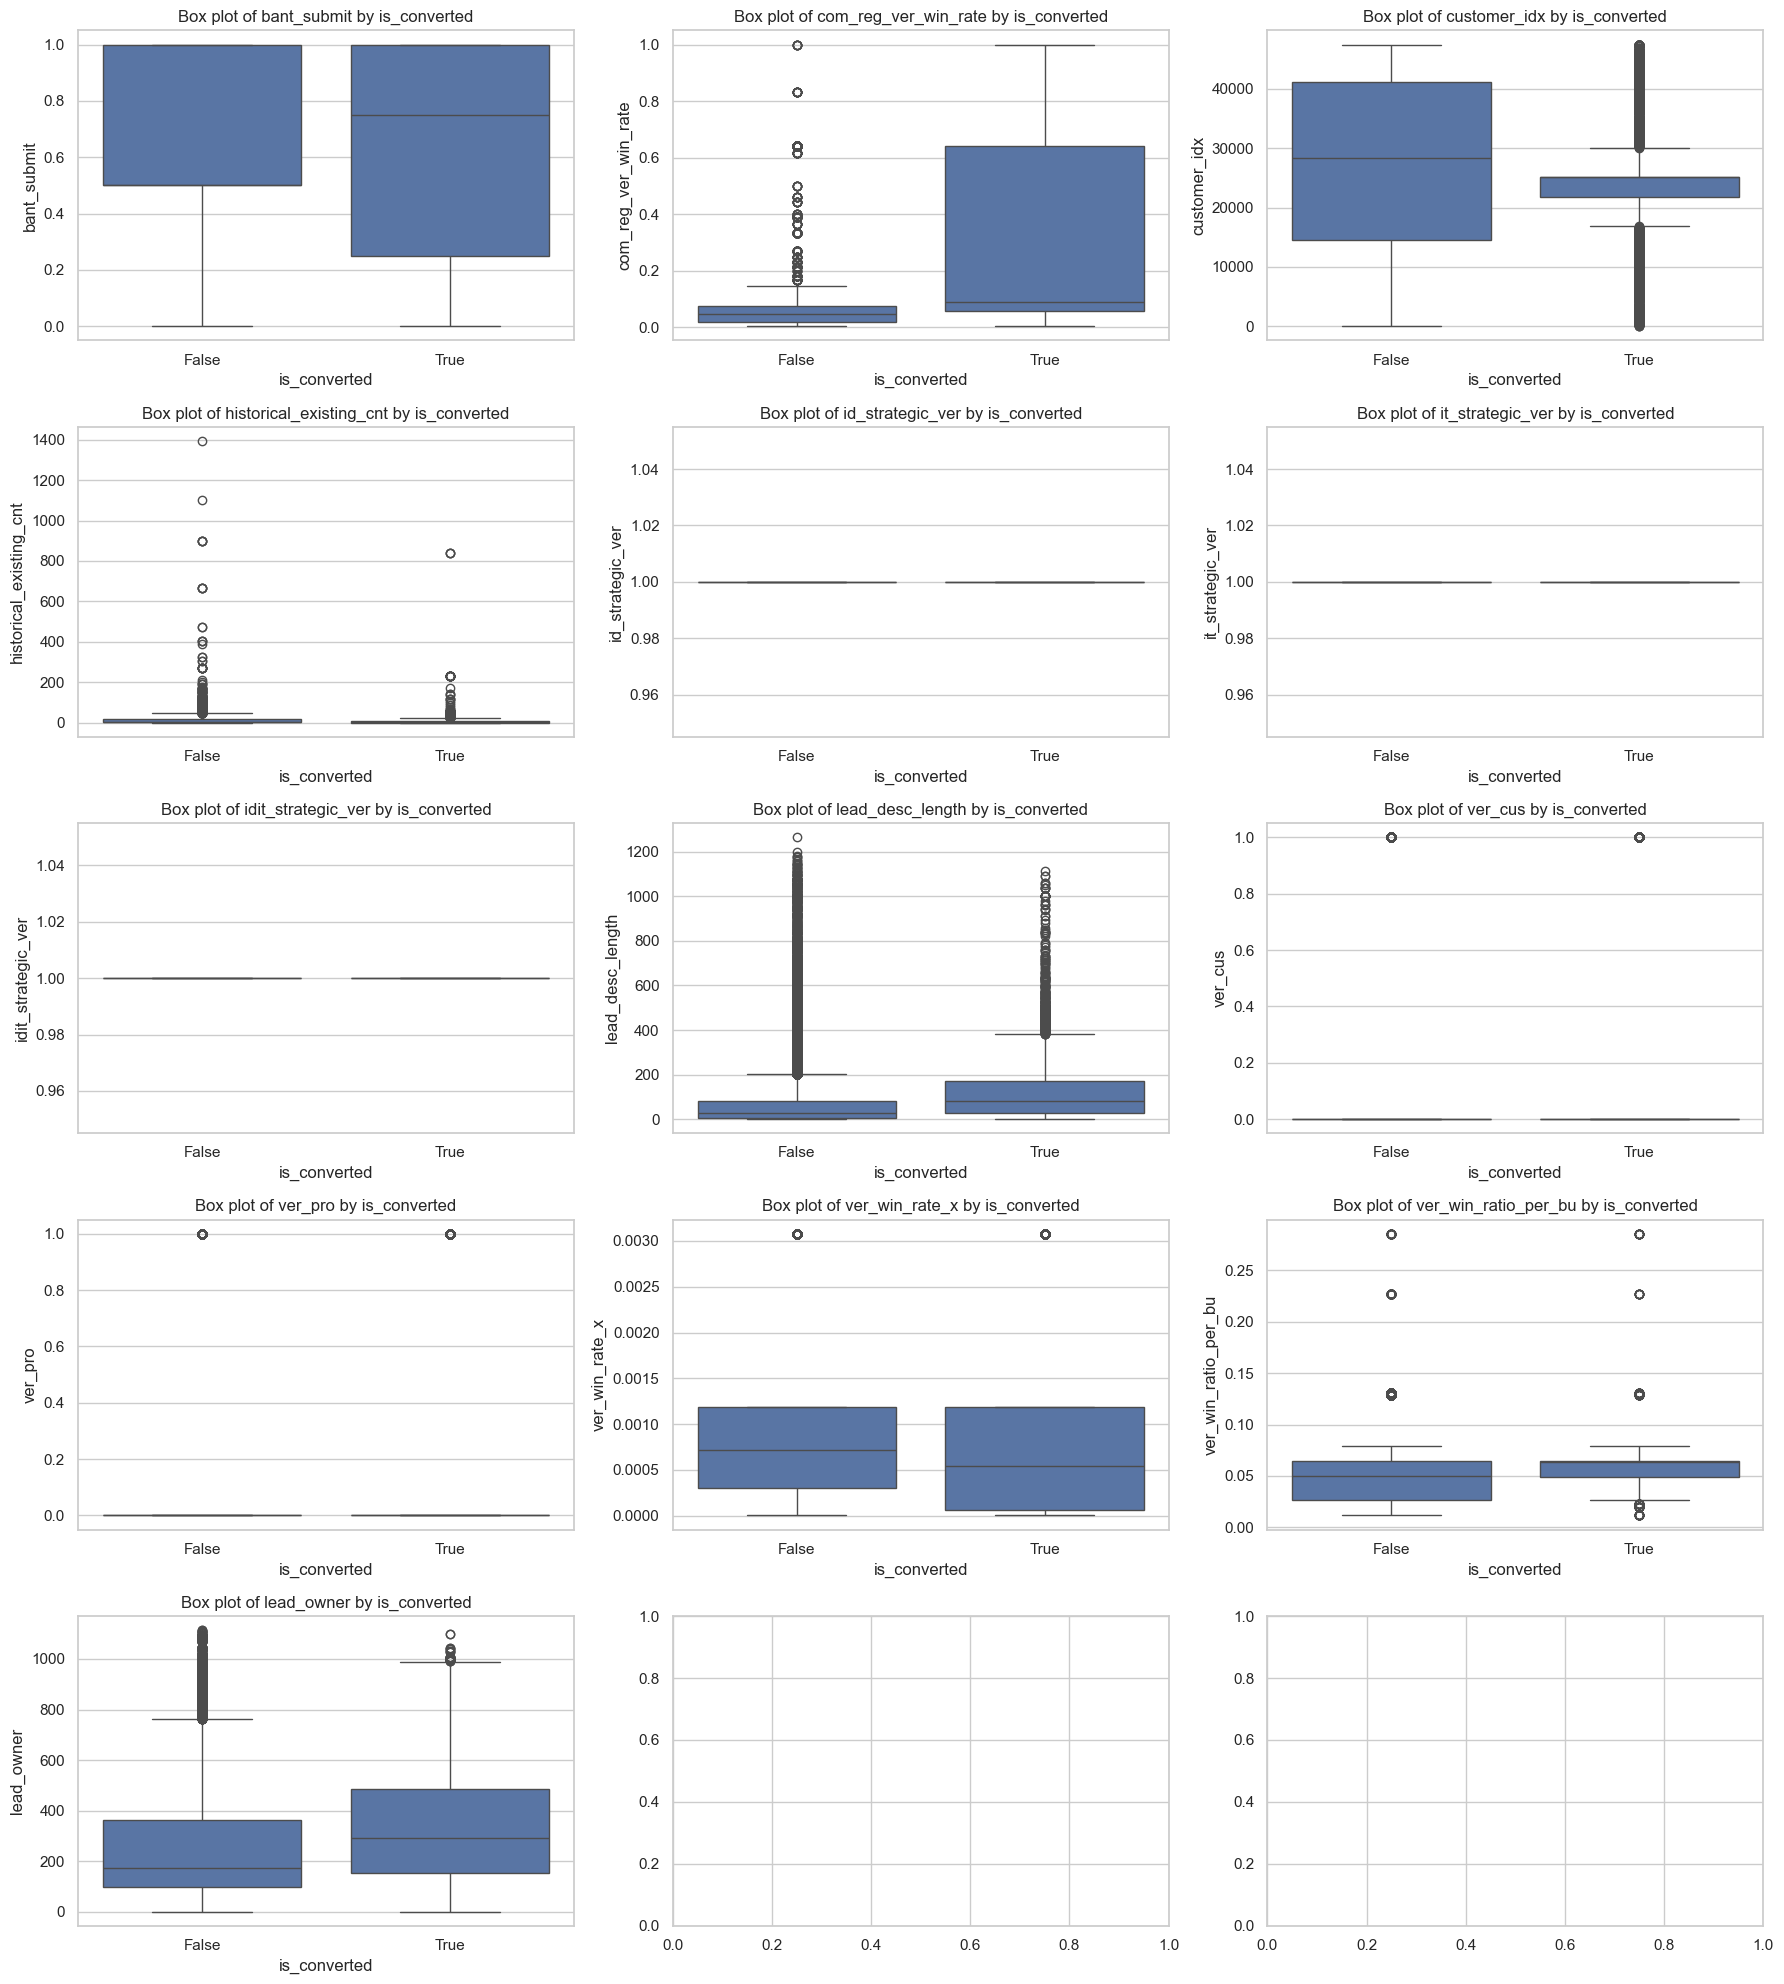

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수만 선택
numeric_vars = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 변수의 개수에 따라 적절한 행과 열의 개수 설정
n = len(numeric_vars)
ncols = 3  # 열의 개수를 설정
nrows = n // ncols if n % ncols == 0 else n // ncols + 1  # 행의 개수 계산

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, nrows*4))

for i, var in enumerate(numeric_vars):
    r = i // ncols
    c = i % ncols
    sns.boxplot(x='is_converted', y=var, data=df_train, ax=axs[r, c])
    axs[r, c].set_title('Box plot of ' + var + ' by is_converted')

plt.tight_layout()
plt.show()


### 통계량 확인

In [34]:
df_train.describe()

,bant_submit,com_reg_ver_win_rate,customer_idx,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,lead_desc_length,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,lead_owner
count,59299.000000,14568.000000,59299.000000,13756.000000,3444.0,1121.0,4565.0,59299.000000,59299.000000,59299.000000,18417.000000,15304.000000,59299.000000
mean,0.634593,0.091685,27114.556333,19.912184,1.0,1.0,1.0,79.271590,0.041603,0.050810,0.001117,0.049288,262.563888
std,0.286066,0.150988,14653.911888,44.697938,0.0,0.0,0.0,132.551067,0.199681,0.219612,0.001104,0.027949,231.605681
min,0.000000,0.003788,2.000000,0.000000,1.0,1.0,1.0,1.000000,0.000000,0.000000,0.000002,0.011583,0.000000
25%,0.500000,0.019900,14913.000000,1.000000,1.0,1.0,1.0,7.000000,0.000000,0.000000,0.000298,0.026846,97.000000
50%,0.500000,0.049180,26774.000000,4.000000,1.0,1.0,1.0,29.000000,0.000000,0.000000,0.000572,0.049840,175.000000
75%,1.000000,0.074949,40368.500000,19.000000,1.0,1.0,1.0,92.000000,0.000000,0.000000,0.001183,0.064566,374.000000
max,1.000000,1.000000,47466.000000,1394.000000,1.0,1.0,1.0,1264.000000,1.000000,1.000000,0.003079,0.285714,1114.000000


In [35]:
df_test.describe()

,id,bant_submit,com_reg_ver_win_rate,customer_idx,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,lead_desc_length,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,lead_owner
count,5271.000000,5271.000000,1788.000000,5271.000000,1275.000000,593.0,53.0,646.0,5271.000000,5271.000000,5271.000000,2373.000000,1906.000000,5271.000000
mean,10686.395940,0.605720,0.102336,24664.497629,21.272941,1.0,1.0,1.0,81.816164,0.146841,0.081389,0.001093,0.058388,304.458736
std,6141.012698,0.365631,0.151790,14615.896802,75.187401,0.0,0.0,0.0,135.063265,0.353981,0.273457,0.001189,0.035738,241.502331
min,1.000000,0.000000,0.003788,1.000000,0.000000,1.0,1.0,1.0,1.000000,0.000000,0.000000,0.000002,0.011583,0.000000
25%,5644.000000,0.250000,0.032787,11173.500000,0.000000,1.0,1.0,1.0,3.000000,0.000000,0.000000,0.000060,0.048630,97.000000
50%,10067.000000,0.500000,0.053892,24151.000000,4.000000,1.0,1.0,1.0,26.000000,0.000000,0.000000,0.000572,0.053571,231.000000
75%,16019.500000,1.000000,0.075000,37680.000000,19.000000,1.0,1.0,1.0,104.000000,0.000000,0.000000,0.001183,0.064566,428.000000
max,21340.000000,1.000000,1.000000,47466.000000,2219.000000,1.0,1.0,1.0,1143.000000,1.000000,1.000000,0.003079,0.285714,1108.000000


### 타겟변수 비율 확인

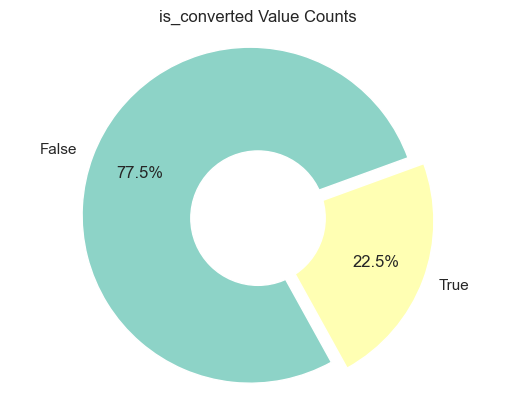

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Seaborn 스타일을 설정합니다.
sns.set(style="whitegrid")

# 'is_converted' 컬럼의 값 비율을 계산합니다.
value_counts = df_test['is_converted'].value_counts(normalize=True)

# 도넛 차트를 그리기 위한 설정을 합니다.
fig, ax = plt.subplots()
ax.pie(value_counts, labels = value_counts.index, autopct='%1.1f%%', startangle=20, 
       colors=sns.color_palette("Set3"), pctdistance=0.7, explode = [0.05]*len(value_counts))

# 원형을 유지하도록 합니다.
plt.axis('equal')  

# 도넛 차트의 중앙에 하얀 원을 추가합니다.
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig.gca().add_artist(centre_circle)

# 차트 제목을 추가합니다.
plt.title('is_converted Value Counts')

# 차트를 출력합니다.
plt.show()


타겟변수의 값중 False 값의 비중이 높음을 확인할수 있다.

.